In [2]:
import numpy as np
import tensorflow as tf
import timeit


import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
np.random.seed(21)
num_repeats = 20
min_size = 500
max_size = 5001
step = 500

In [10]:
def benchmark_numpy():
    times = []
    print("Benchmarking Numpy " + str(np.__version__))

    for i in range(min_size, max_size, step):
        print(i)
        global A, B
        A = np.random.rand(i, i).astype(np.float32)
        B = np.random.rand(i, i).astype(np.float32)

        current_times = [i]

        timer = timeit.Timer("numpy.dot(A, B)", "import numpy; from __main__ import A, B")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))

        timer = timeit.Timer("numpy.exp(A)", "import numpy; from __main__ import A")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))

        timer = timeit.Timer("numpy.sum(A)", "import numpy; from __main__ import A")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))

        timer = timeit.Timer("A + B", "import numpy; from __main__ import A, B")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))

        timer = timeit.Timer("numpy.mean(A)", "import numpy; from __main__ import A")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))

        timer = timeit.Timer("numpy.min(A)", "import numpy; from __main__ import A")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))

        times.append(current_times)

    times = np.array(times)
    return times

In [11]:
np_times = benchmark_numpy()

Benchmarking Numpy 1.12.1
500
1000
1500
2000
2500
3000
3500
4000
4500
5000


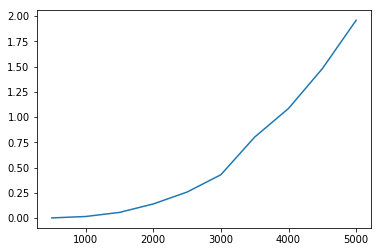

In [21]:
plt.plot(np_times[:,0],np_times[:,1])

In [24]:
def benchmark_tensorflow():
    print("Benchmarking Tensorflow " + str(tf.__version__))

    times = []

    for i in range(min_size, max_size, step):
        print(i)
        global A, B
        A = np.random.rand(i, i).astype(np.float32)
        B = np.random.rand(i, i).astype(np.float32)
        current_times = [i]

        global f
        # Set up the tensorflow stuff
        A = tf.constant(A)
        B = tf.constant(B)
        global sess, result

        sess = tf.Session()
        result = tf.matmul(A, B)
        timer = timeit.Timer("sess.run(result)", setup="import tensorflow; from __main__ import sess, A, B, result")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))
        sess.close()

        sess = tf.Session()
        result = tf.exp(A)
        timer = timeit.Timer("sess.run(result)", setup="import tensorflow; from __main__ import sess, A, B, result")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))
        sess.close()

        sess = tf.Session()
        result = tf.reduce_sum(A)
        timer = timeit.Timer("sess.run(result)", setup="import tensorflow; from __main__ import sess, A, B, result")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))
        sess.close()

        sess = tf.Session()
        result = tf.add(A, B)
        timer = timeit.Timer("sess.run(result)", setup="import tensorflow; from __main__ import sess, A, B, result")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))
        sess.close()

        sess = tf.Session()
        result = tf.reduce_mean(A)
        timer = timeit.Timer("sess.run(result)", setup="import tensorflow; from __main__ import sess, A, B, result")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))
        sess.close()

        sess = tf.Session()
        result = tf.reduce_min(A)
        timer = timeit.Timer("sess.run(result)", setup="import tensorflow; from __main__ import sess, A, B, result")
        current_times.append(np.min(timer.repeat(num_repeats, 1)))
        sess.close()

        times.append(current_times)

    times = np.array(times)
    
    return times

In [25]:
tf_times = benchmark_tensorflow()

Benchmarking Tensorflow 1.1.0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000


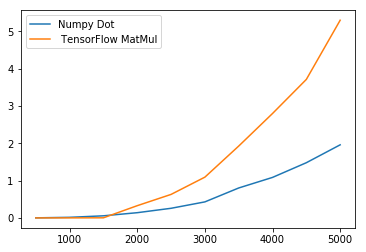

In [28]:
plt.plot(np_times[:,0],np_times[:,1], label='Numpy Dot')
plt.plot(tf_times[:,0],tf_times[:,1], label = ' TensorFlow MatMul')
plt.legend()